In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_1__.csv')
df_1 = df_1.drop(['index'],axis=1)
df_1.head()

,data,valor
0,2016-08-29,9.00
1,2016-08-30,1.60
2,2016-08-31,15311.70
3,2016-09-01,13932.67
4,2016-09-02,11535.45


In [3]:
df_1.tail()

,data,valor
584,2018-10-25,7865.8
585,2018-10-26,64380.3
586,2018-10-27,17235.1
587,2018-10-28,62124.4
588,2018-10-31,17325.9


In [4]:
df_1.describe()

,valor
count,589.000000
mean,35257.608981
std,36368.759144
min,0.020000
25%,11586.760000
50%,18869.940000
75%,46002.200000
max,196344.060000


In [5]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [6]:
df = df_1
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-08-29,9.00
1,2016-08-30,1.60
2,2016-08-31,15311.70
3,2016-09-01,13932.67
4,2016-09-02,11535.45


In [7]:
prediction_size = 21
train_df = df[:-prediction_size]

In [8]:
train_df.tail()

,ds,y
563,2018-09-26,13598.15
564,2018-09-27,9937.20
565,2018-09-28,21288.81
566,2018-09-29,20712.30
567,2018-09-30,85709.60


In [9]:
m = Prophet()
m.fit(train_df)

In [10]:
future = m.make_future_dataframe(periods=31)

forecast = m.predict(future)

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
594,2018-10-27,28549.665555,8241.062197,72498.214301,28549.665496,28549.665627,10711.151053,10711.151053,10711.151053,3032.626376,3032.626376,3032.626376,7678.524677,7678.524677,7678.524677,0.0,0.0,0.0,39260.816609
595,2018-10-28,28540.724556,62458.000980,122210.282282,28540.724492,28540.724634,63887.183081,63887.183081,63887.183081,56172.400542,56172.400542,56172.400542,7714.782539,7714.782539,7714.782539,0.0,0.0,0.0,92427.907637
596,2018-10-29,28531.783557,-5872.213044,54835.986623,28531.783488,28531.783640,-3112.660975,-3112.660975,-3112.660975,-10876.391172,-10876.391172,-10876.391172,7763.730198,7763.730198,7763.730198,0.0,0.0,0.0,25419.122582
597,2018-10-30,28522.842557,-780.149163,55490.767995,28522.842483,28522.842648,-946.388683,-946.388683,-946.388683,-8769.829958,-8769.829958,-8769.829958,7823.441275,7823.441275,7823.441275,0.0,0.0,0.0,27576.453875
598,2018-10-31,28513.901558,-8805.275379,52901.679886,28513.901481,28513.901652,-4699.892668,-4699.892668,-4699.892668,-12590.878504,-12590.878504,-12590.878504,7890.985836,7890.985836,7890.985836,0.0,0.0,0.0,23814.008890


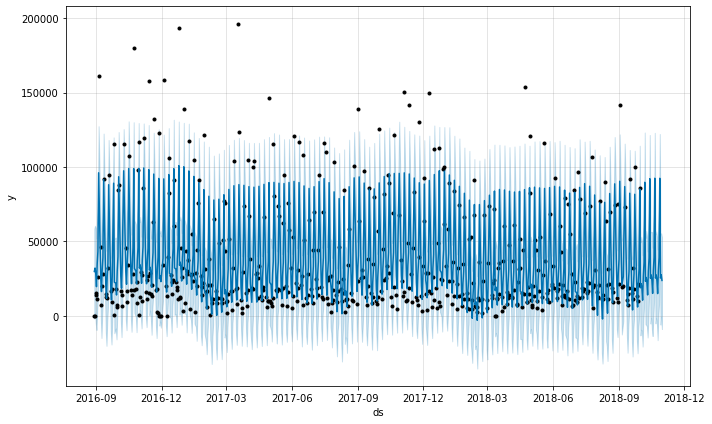

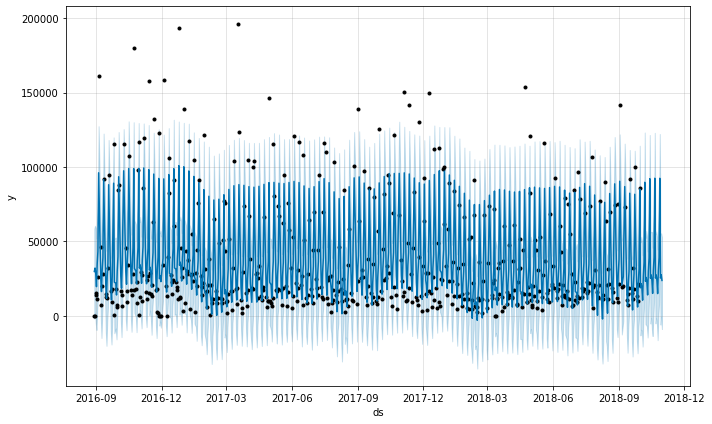

In [12]:
m.plot(forecast)

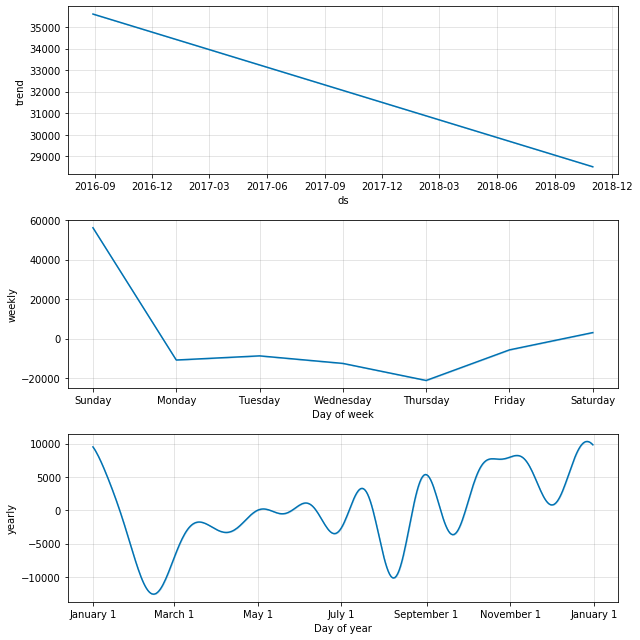

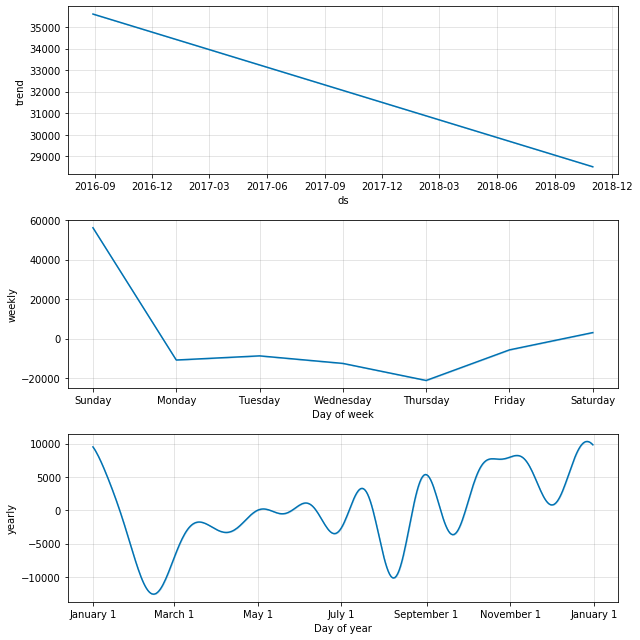

In [13]:
m.plot_components(forecast)

In [14]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [15]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()


In [16]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 15542.452591568772
MSE: 389738077.6622794
RMSE: 19741.785067776404


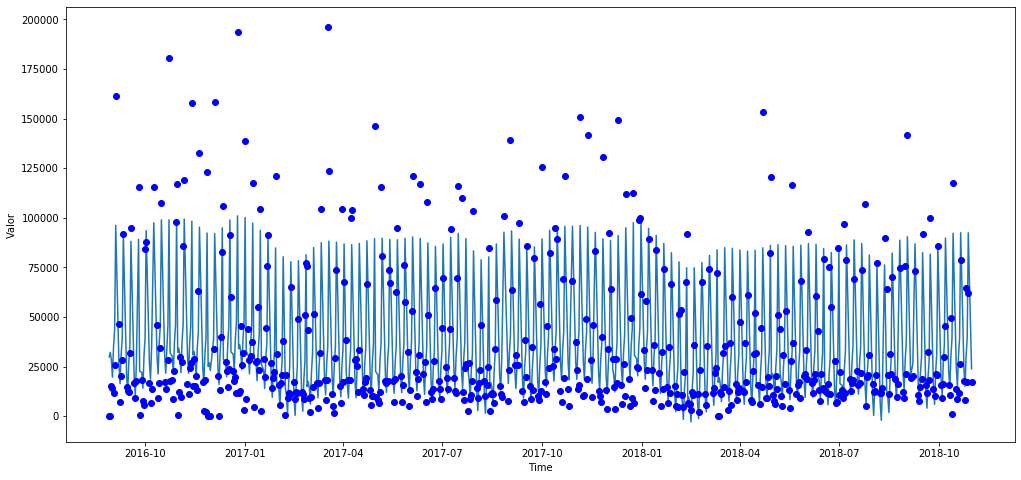

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()